Генерация выборок (нормальное распределение, a = 4, b = 8):

In [4]:
import scipy.stats as sps
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

A = 4
B = 8
SIZE_FIRST = 40
SIZE_SECOND = 20

#first = np.random.normal(A, B, SIZE_FIRST)
#second = np.random.normal(B, A, SIZE_SECOND)

first = sps.norm(A, B).rvs(size=SIZE_FIRST)
second = sps.norm(B, A).rvs(size=SIZE_SECOND)

print(first)
print(second)

[  0.91925303 -10.93260063   4.10828729   7.7037496    5.13758028
  13.79018565   6.02400417   9.68351387   3.73774026   3.25797683
  -7.09231089   1.18105113   7.41756606   0.97053958   4.28008792
   0.31820847   0.16950065   2.43945481  -0.6701395    5.67893299
   7.3880051   11.90298134  13.09467245  -7.63661607  -5.46724422
  15.44316824   6.0100412   -2.14202006   1.20012463   6.95645158
   0.2907575    0.59638282   3.2396361    3.21876514   9.13736494
  -7.99015781  13.90131079   7.15914021  10.56998733  11.56035444]
[ 6.15204799  7.44873905  9.23769922  2.10430764  2.51084001  9.20392267
 11.96997522  9.37316595 13.00696171 15.05575038  8.707594    8.80978469
  6.84168396  8.07862699  0.28671642  3.0599549   3.42173187 13.81456307
 10.59728594  1.342453  ]


Объединение и создание вариационного ряда:

In [5]:
joined_list = [*first, *second]
print("JOIN: ", joined_list)

sorted_list = sorted(joined_list)
print("SORTED: ", sorted_list)

JOIN:  [0.9192530337072187, -10.932600630333209, 4.108287294942655, 7.70374959588957, 5.137580278199382, 13.790185649779676, 6.024004171507959, 9.683513874869465, 3.7377402642913475, 3.257976828441939, -7.0923108875207515, 1.1810511339254344, 7.417566064123616, 0.9705395823709511, 4.280087915587677, 0.3182084733940491, 0.16950064543379284, 2.439454813237874, -0.6701395010431659, 5.678932990823839, 7.388005101077414, 11.902981338176941, 13.094672446728849, -7.636616066699924, -5.467244224836978, 15.443168238156467, 6.010041201062302, -2.1420200583451603, 1.200124626301582, 6.956451582804956, 0.29075749719076294, 0.596382819354067, 3.2396360998539873, 3.218765138842029, 9.137364937030256, -7.990157809405758, 13.901310790800741, 7.159140210662791, 10.569987330666109, 11.560354438496304, 6.152047993568172, 7.448739052176972, 9.237699221211562, 2.1043076422028575, 2.5108400088523926, 9.203922665401773, 11.969975222441809, 9.373165946207234, 13.006961706793913, 15.055750378780553, 8.70759399

Ищем выборочные характеристики:

In [6]:
max_value = np.amax(sorted_list)
min_value = np.amin(sorted_list)
n = len(sorted_list)
mean = np.mean(sorted_list)
median = np.median(sorted_list)
diff_between_max_min = max_value - min_value
variance = np.var(sorted_list)
variance_adj = np.var(sorted_list, ddof=1) #исправленная дисперсия
#sigma = np.sqrt(variance)
sigma = np.std(sorted_list)
#sigma_adj = np.sqrt(variance_adj)
sigma_adj = np.std(sorted_list, ddof=1) #исправленное отклонение

sum = 0
for a in sorted_list:
    sum += np.abs(a - mean)

srotkl = sum/n

sum = 0
for a in sorted_list:
    sum += ((a - mean) / sigma) ** 4

ekscess = ((n * (n+1)) / ((n-1)*(n-2)*(n-3)) * sum) - 3 *((n-1) ** 2) / ((n-2) * (n-3))

sum = 0
for a in sorted_list:
    sum += ((a - mean) / sigma) ** 3

skos = n / ((n-1)*(n-2)) * sum


print("MIN: ", min_value, "\nMAX:", max_value,"\nОБЪЕМ ВЫБОРКИ:", n,"\nВЫБОРОЧНОЕ СРЕДНЕЕ:", mean,"\nМЕДИАНА:",
 median,"\nРАЗМАХ: ", diff_between_max_min,"\nДИСПЕРСИЯ: ", variance, "\nИСПРАВЛЕННАЯ ДИСПЕРСИЯ: ",variance_adj,
 "\nСР КВ ОТКЛ: ", sigma, "\nСР КВ ОТЛ ИСПР: ", sigma_adj, "\nсреднее абсолютное отклонение от выборочного среднего: ", srotkl,
 "\nэксцесс эмпирического распределения: ", ekscess, "\nасимметрия эмпирического распределения: ", skos)

MIN:  -10.932600630333209 
MAX: 15.443168238156467 
ОБЪЕМ ВЫБОРКИ: 60 
ВЫБОРОЧНОЕ СРЕДНЕЕ: 5.126324865296941 
МЕДИАНА: 5.84448709594307 
РАЗМАХ:  26.375768868489676 
ДИСПЕРСИЯ:  34.86649382241506 
ИСПРАВЛЕННАЯ ДИСПЕРСИЯ:  35.457451344828876 
СР КВ ОТКЛ:  5.904785671166656 
СР КВ ОТЛ ИСПР:  5.954615969550755 
среднее абсолютное отклонение от выборочного среднего:  4.760480513252071 
эксцесс эмпирического распределения:  0.2647656022287883 
асимметрия эмпирического распределения:  -0.5279339308484156


Гистограмма:

21
1.2559889937376036
[-10.932600630333209, -9.676611636595606, -8.420622642858003, -7.1646336491203995, -5.908644655382796, -4.652655661645192, -3.3966666679075885, -2.140677674169985, -0.8846886804323812, 0.3713003133052224, 1.627289307042826, 2.8832783007804297, 4.139267294518033, 5.395256288255637, 6.651245281993241, 7.907234275730844, 9.163223269468448, 10.419212263206052, 11.675201256943655, 12.931190250681258, 14.18717924441886, 15.443168238156463]
[1 0 2 1 1 0 1 0 5 6 3 7 2 4 7 4 4 3 2 5 1]


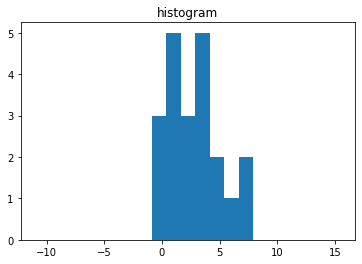

In [7]:
n_log_2 = np.log2(n)
num_of_intervals = round(1 + 3.322 * n_log_2)
print(num_of_intervals)
interval_step = (max_value - min_value) / num_of_intervals
print(interval_step)
bins = []
bins.append(min_value)
for i in range(num_of_intervals):
    bins.append(bins[i] + interval_step)
print(bins)
hist,bins = np.histogram(sorted_list, bins= bins)
print(hist)
plt.hist(hist, bins) 
plt.title("histogram") 
plt.show()

#his = np.histogram(sorted_list)

Относительные частоты и гистограмма:

[0.016666666666666666, 0.0, 0.03333333333333333, 0.016666666666666666, 0.016666666666666666, 0.0, 0.016666666666666666, 0.0, 0.08333333333333333, 0.1, 0.05, 0.11666666666666667, 0.03333333333333333, 0.06666666666666667, 0.11666666666666667, 0.06666666666666667, 0.06666666666666667, 0.05, 0.03333333333333333, 0.08333333333333333, 0.016666666666666666]
0.983333333333333


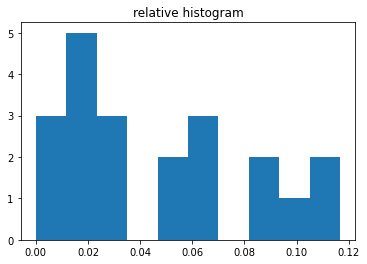

In [8]:
relatively_hist = []
sum = 0
for i in range(num_of_intervals):
    relatively_hist.append(hist[i] / n)
    sum += relatively_hist[i]

print(relatively_hist)
print(round(sum,15))

plt.hist(relatively_hist)
plt.title("relative histogram") 
plt.show()

Плотности относительных частот, полигон:

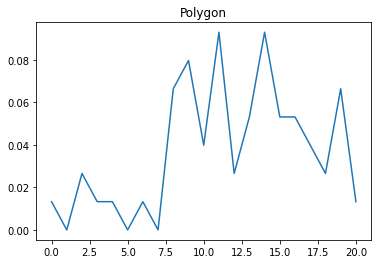

In [9]:
relative_friq_density = []
for i in range(num_of_intervals):
    relative_friq_density.append(relatively_hist[i] / interval_step)

#plt.hist(relative_friq_density)
plt.figure()
plt.plot(relative_friq_density)
plt.title("Polygon") 
plt.show()

Кумулятивные (интегральные) частоты:

In [10]:
cumulative_density = []
cumulative_density.append(0)
for i in range(num_of_intervals):
    cumulative_density.append(cumulative_density[i] + hist[i])

print(hist)
print(cumulative_density)

[1 0 2 1 1 0 1 0 5 6 3 7 2 4 7 4 4 3 2 5 1]
[0, 1, 1, 3, 4, 5, 5, 6, 6, 11, 17, 20, 27, 29, 33, 40, 44, 48, 51, 53, 58, 59]


Относительные кумулятивные частоты:

[0.0, 0.016666666666666666, 0.016666666666666666, 0.05, 0.06666666666666667, 0.08333333333333333, 0.08333333333333333, 0.1, 0.1, 0.18333333333333332, 0.2833333333333333, 0.3333333333333333, 0.45, 0.48333333333333334, 0.55, 0.6666666666666666, 0.7333333333333333, 0.8, 0.85, 0.8833333333333333, 0.9666666666666667, 0.9833333333333333]


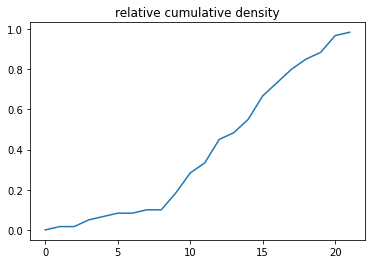

In [11]:
relative_cumulative_density = []
for i in range(len(cumulative_density)):
    relative_cumulative_density.append(cumulative_density[i] / n)

print(relative_cumulative_density)
plt.figure()
plt.plot(relative_cumulative_density)
#plt.hist(relative_cumulative_density)
plt.title("relative cumulative density") 
plt.show()